### Udacity Data Scientist Nanodegree - Part 1 Project

For this project we are following the **CRISP-DM process**, which consists of the following parts:

1. Business Understanding 
2. Data Understanding
3. Data Preparation 
4. Modeling
5. Evaluation
6. Deployment

### 1. Business Questions

1. How does the availability varies during the year in Seattle?
2. Which are the neighbourhoods (zip codes) with better price/review ratio?
3. Can we predict the prices of the apartments?

### 2. Data Understanding

In [1]:
# Import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# Load files into dataframes
calendar_df = pd.read_csv('data/calendar.csv')
listings_df = pd.read_csv('data/listings.csv')
reviews_df = pd.read_csv('data/reviews.csv')

In [3]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [5]:
# Number of appartments and features
listings_df.shape

(3818, 92)

In [6]:
# List of columns wit NaN values
listings_df.isnull().sum()[listings_df.isnull().sum()>0].sort_values(ascending=False)

license                        3818
square_feet                    3721
monthly_price                  2301
security_deposit               1952
weekly_price                   1809
notes                          1606
neighborhood_overview          1032
cleaning_fee                   1030
transit                         934
host_about                      859
host_acceptance_rate            773
review_scores_accuracy          658
review_scores_checkin           658
review_scores_value             656
review_scores_location          655
review_scores_cleanliness       653
review_scores_communication     651
review_scores_rating            647
reviews_per_month               627
first_review                    627
last_review                     627
space                           569
host_response_time              523
host_response_rate              523
neighbourhood                   416
thumbnail_url                   320
medium_url                      320
xl_picture_url              

In [7]:
# We could drop the columns with more than 50% of NaNs
drop_NaNs = ['license', 'square_feet', 'monthly_price','security_deposit']

In [8]:
# Types of data
listings_df.dtypes.value_counts()

object     62
float64    17
int64      13
dtype: int64

In [9]:
# Cancellation Policies
listings_df.cancellation_policy.value_counts()

strict      1417
moderate    1251
flexible    1150
Name: cancellation_policy, dtype: int64

In [10]:
# Number of bathrooms
listings_df.bathrooms.value_counts()

1.0    2882
2.0     373
1.5     248
2.5     124
3.0      64
3.5      57
0.5      31
0.0       8
4.0       8
4.5       3
5.0       2
8.0       2
Name: bathrooms, dtype: int64

In [11]:
# Influence of number of bathrooms with review score
listings_df.groupby(['bathrooms'])['review_scores_value'].mean().sort_values(ascending=False)

bathrooms
8.0    10.000000
4.5     9.666667
2.5     9.556701
1.5     9.544554
3.5     9.540000
4.0     9.500000
0.0     9.500000
1.0     9.455339
2.0     9.389439
3.0     9.377358
5.0     9.000000
0.5     8.857143
Name: review_scores_value, dtype: float64

It seems that the number of bathrooms does not impact in the review scores (Less the number is huge!)

In [12]:
# Columns with low variability
listings_df.nunique()[listings_df.nunique()==1]

scrape_id                1
last_scraped             1
experiences_offered      1
market                   1
country_code             1
country                  1
has_availability         1
calendar_last_scraped    1
requires_license         1
jurisdiction_names       1
dtype: int64

In [13]:
# We could drop these columns
drop_low_variability = list(listings_df.nunique()[listings_df.nunique()==1].index)

In [14]:
# Columns that could be boolean
could_boolean = list(listings_df.nunique()[listings_df.nunique()==2].index)

In [15]:
listings_df[could_boolean].dtypes

host_acceptance_rate                object
host_is_superhost                   object
host_has_profile_pic                object
host_identity_verified              object
state                               object
is_location_exact                   object
instant_bookable                    object
require_guest_profile_picture       object
require_guest_phone_verification    object
dtype: object

No one of these columns are boolean, so this is something we should treat in the next chapter

In [16]:
price_columns = [column for column in listings_df.columns if 'price' in column]
price_columns

['price', 'weekly_price', 'monthly_price']

In [17]:
host_columns = [column for column in listings_df.columns if 'host' in column]
host_columns

['host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'calculated_host_listings_count']

In [18]:
review_columns = [column for column in listings_df.columns if 'review' in column]
review_columns

['number_of_reviews',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [19]:
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [20]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 26.6+ MB


In [21]:
calendar_df.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [22]:
calendar_df.shape

(1393570, 4)

Let's compare the price values for a listing between the calendar and listing dataframes

In [23]:
listings_df.id[1], listings_df.price[1]

(953595, '$150.00')

In [24]:
calendar_df[calendar_df.listing_id == listings_df.id[1]].dropna(subset=['price'])['price'].value_counts()

$125.00    37
$158.00     7
$190.00     7
$144.00     7
$186.00     6
           ..
$439.00     1
$132.00     1
$197.00     1
$141.00     1
$156.00     1
Name: price, Length: 92, dtype: int64

For some cases the price is fix and the value is the same in both df, in other cases the price may vary. When we clean the data, we will adress it and see if the mean is taken for the listing dataframe

** Data Preparation needed for Listings DF**

- select which columns use
- differenciate cat/num columms
- check if types
- decide which drop
- clean columns and fillna

**Data Preparation needed Calendar DF**

- date to datetime
- available boolean -> True/False -> Get dummies
- price should be float
- Merge with listings_df in new df

### 3. Data Preparation

In [25]:
# Calendar_df

# Convert date to correct format
calendar_df.date = pd.to_datetime(calendar_df.date)

# Convert price NaNs to "0" and object to float 
calendar_df.price = calendar_df.price.str.replace('$','').str.replace(',','')
calendar_df.price.fillna(0, inplace=True)
calendar_df.price = calendar_df.price.astype('float64')

# Set availability to boolean (0,1)
def map_boolean(dfs):
    '''
    Change object columns with t/f to boolean(numerical) values of 1/0
    Input: Dataseries to change
    Output: Updated Dataseries
    '''
    mapping = {'t':1,'f':0}
    dfs = dfs.map(mapping).astype(np.uint8)
    return dfs

calendar_df.available = map_boolean(calendar_df.available)

In [26]:
# Listings_df
df_l = listings_df.copy()

# Drop previous selected columns
df_l.drop(drop_low_variability,axis=1, inplace=True)
df_l.drop(drop_NaNs,axis=1, inplace=True)

# Select only necessary columns
selected = ['id','neighbourhood','zipcode','smart_location', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'price', 'weekly_price',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights','availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'reviews_per_month']

df_l = df_l[selected]

# Change f/t to 0/1
bool_col = list(df_l.nunique()[df_l.nunique()==2].index)
for col in bool_col:
    df_l[col] = map_boolean(df_l[col])

# price,weekly_price,cleaning_fee,extra_people should be floats
for col in ['price','weekly_price','cleaning_fee','extra_people']:
    df_l[col] = df_l[col].str.replace('$','').str.replace(',','')
    df_l[col] = df_l[col].astype('float64')
    df_l[col].fillna(df_l[col].mean(), inplace=True)
    

# Select continous and categorical columns
cont_cols = df_l.select_dtypes(exclude=['object'])
cat_cols = df_l.select_dtypes(include=['object'])

In [27]:
# Continous columns with missing values
cont_cols.isnull().sum()[cont_cols.isnull().sum()>0]

bathrooms                       16
bedrooms                         6
beds                             1
review_scores_rating           647
review_scores_accuracy         658
review_scores_cleanliness      653
review_scores_checkin          658
review_scores_communication    651
review_scores_location         655
review_scores_value            656
reviews_per_month              627
dtype: int64

In [28]:
# Fill missing values with the mean
for  col in cont_cols.columns:
    cont_cols[col].fillna(cont_cols[col].mean(),inplace=True)

C:\Users\Guillermo\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [29]:
# How manu different values are for the catergorical columns
cat_cols.nunique()

neighbourhood            81
zipcode                  28
smart_location            7
property_type            16
room_type                 3
bed_type                  5
amenities              3284
cancellation_policy       3
dtype: int64

We see here that amenities has too many different values. This could be a dimensionality problem for get dummies. Maybe we could just count how manu amenities is a listing offering and treat the column as continous one.

In [30]:
cat_cols.amenities = [len(amenitie.split(',')) for amenitie in cat_cols.amenities]

C:\Users\Guillermo\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [31]:
cont_cols = pd.concat([cont_cols, cat_cols.amenities],axis=1)

In [32]:
cat_cols.drop(['amenities'],axis=1,inplace=True)

C:\Users\Guillermo\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [33]:
# Categorical columns with missing values
cat_cols.isnull().sum()[cat_cols.isnull().sum()>0]

neighbourhood    416
zipcode            7
property_type      1
dtype: int64

We can't use the categorical columns directly, so we have to preprocess them with get_dummies:

In [34]:
for col in cat_cols.columns:
    cat_cols = pd.concat([cat_cols.drop([col],axis=1),pd.get_dummies(cat_cols[col], prefix=col, prefix_sep = '_',dummy_na=True)],axis=1)

In [35]:
cat_cols

,neighbourhood_Alki,neighbourhood_Arbor Heights,neighbourhood_Atlantic,neighbourhood_Ballard,neighbourhood_Belltown,neighbourhood_Bitter Lake,neighbourhood_Brighton,neighbourhood_Broadview,neighbourhood_Broadway,neighbourhood_Bryant,...,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3814,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3815,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3816,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [36]:
# Concat cat/cont dateframes in one new cleaned dataframe:
df_l_cleaned = pd.concat([cont_cols,cat_cols],axis=1)

In [37]:
# Check if there are still NaNs values
df_l_cleaned.isnull().sum()[df_l_cleaned.isnull().sum()>0]

Series([], dtype: int64)

In [38]:
# Check the columns types
df_l_cleaned.select_dtypes(include=['object'])

""
0
1
2
3
4
...
3813
3814
3815
3816


In [39]:
df_l_cleaned.shape

(3818, 183)

In [40]:
# Let's check now if the prices in the listing dateframe are the mean of the calendar dataframe

df_l_cleaned.id[1], df_l_cleaned.price[1]

(953595, 150.0)

In [41]:
tmp = calendar_df[calendar_df.price>0]

In [42]:
tmp[tmp.listing_id == df_l_cleaned.id[1]].price.mean(),tmp[tmp.listing_id == df_l_cleaned.id[1]].price.mode()

(170.93127147766322, 0    125.0
 dtype: float64)

It is nor the mean nor the mode, for the prediction purpuses we will at first use the price value of the listing dataframe

### We can answer now our first two business questions:

**1. How does the availability and prices vary during the year in Seattle?**

In [43]:
# Mean prices along the year
mean_prices = calendar_df[calendar_df.available==1].groupby(['date']).price.mean()

In [44]:
mean_prices = mean_prices.reset_index()
mean_prices.head()

,date,price
0,2016-01-04,122.085879
1,2016-01-05,120.681307
2,2016-01-06,120.928258
3,2016-01-07,120.958896
4,2016-01-08,127.640853


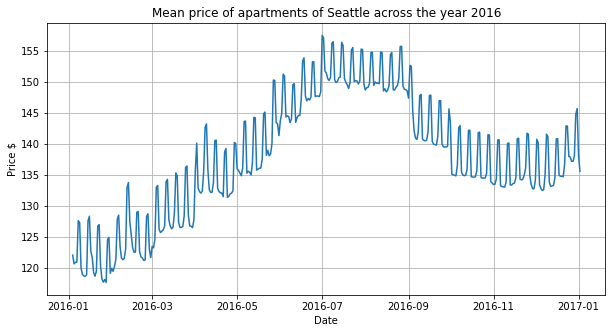

In [61]:
plt.figure(figsize=[10,5])
plt.plot(mean_prices['date'],mean_prices['price'])
plt.ylabel('Price $')
plt.xlabel('Date')
plt.title('Mean price of apartments of Seattle across the year 2016')
plt.grid()

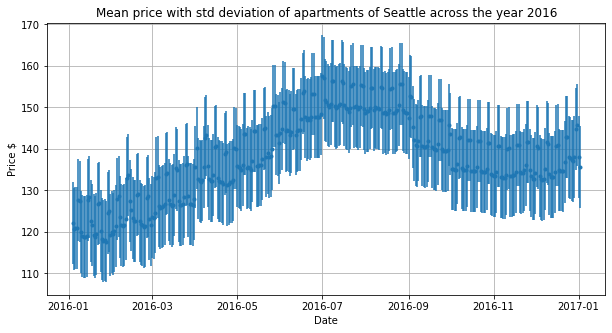

In [62]:
plt.figure(figsize=(10,5))
plt.errorbar(mean_prices['date'],mean_prices['price'], mean_prices['price'].std(), linestyle='None', marker='.')
plt.ylabel('Price $')
plt.xlabel('Date')
plt.title('Mean price with std deviation of apartments of Seattle across the year 2016')
plt.grid()

In [47]:
calendar_df.rename(columns = {'listing_id':'id'},inplace=True)
calendar_df.columns

Index(['id', 'date', 'available', 'price'], dtype='object')

In [48]:
availability = calendar_df.groupby(['date']).available.value_counts(normalize=True)[:,1].reset_index()

availability['available'] = availability['available'].apply(lambda x: x*100)

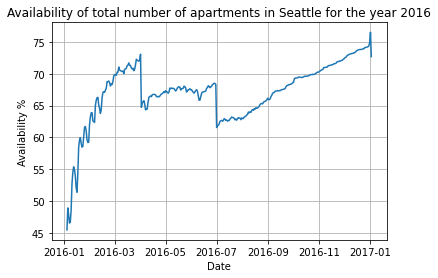

In [63]:
plt.plot(availability['date'],availability['available'])
plt.ylabel('Availability %')
plt.xlabel('Date')
plt.title('Availability of total number of apartments in Seattle for the year 2016')
plt.grid()

In [50]:
df = calendar_df.merge(df_l[['id','zipcode']], on = 'id')

In [51]:
df.zipcode.nunique()

28

In [52]:
calendar_df['year']= calendar_df['date'].dt.year
calendar_df['month']= calendar_df['date'].dt.month
calendar_df['day']= calendar_df['date'].dt.day
calendar_df['week_of_year'] = calendar_df['date'].dt.week
calendar_df['day_of_week'] = calendar_df['date'].dt.dayofweek

In [53]:
calendar_df[calendar_df.available==1].groupby(['month']).price.mean().sort_values(ascending=False)

month
7     152.094150
8     150.656594
6     147.473137
9     143.255949
5     139.538183
12    137.251835
10    137.031939
11    135.688738
4     135.097005
3     128.644488
2     124.293927
1     122.912176
Name: price, dtype: float64

In [54]:
calendar_df[calendar_df.available==1].groupby(['month']).price.describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,64937.0,122.912176,88.708143,12.0,70.0,99.0,148.0,1000.0
2,73321.0,124.293927,91.550076,20.0,72.0,100.0,149.0,1000.0
3,83938.0,128.644488,94.371410,20.0,75.0,100.0,150.0,1099.0
4,76037.0,135.097005,98.232098,20.0,75.0,110.0,160.0,1099.0
5,79971.0,139.538183,102.863280,20.0,75.0,110.0,169.0,1099.0
6,77244.0,147.473137,112.481803,20.0,76.0,110.0,175.0,1099.0
7,74222.0,152.094150,120.078098,20.0,75.0,115.0,180.0,1240.0
8,76347.0,150.656594,118.754189,20.0,75.0,114.0,179.0,1250.0
9,77246.0,143.255949,108.804290,20.0,75.0,110.0,175.0,1450.0


In [55]:
calendar_df.groupby(['day_of_week']).price.mean().sort_values(ascending=False)

day_of_week
4    95.678612
5    95.624370
6    91.837727
3    91.403801
0    91.052596
2    90.992873
1    90.988420
Name: price, dtype: float64

**2. Which are the neighbourhoods (zip codes) with better price/review ratio?**

In [56]:
df_l_cleaned['review/price ratio'] = df_l_cleaned.review_scores_value/df_l_cleaned.price
df_l_cleaned['zipcode'] = listings_df['zipcode']
df_l_cleaned['neighbourhood'] = listings_df['neighbourhood']

In [57]:
df_l_cleaned['zipcode'].fillna('Unknown Zipcode',inplace=True)
df_l_cleaned['neighbourhood'].fillna('No neighbourhood', inplace=True)

In [94]:
best_zips = df_l_cleaned.groupby(['zipcode'])['review/price ratio'].mean().sort_values(ascending=False).index

In [109]:
list(best_zips[0:10])

['99\n98122',
 '98108',
 '98125',
 '98106',
 '98118',
 '98133',
 '98177',
 '98146',
 '98115',
 '98105']

In [110]:
nbh = {}
for zc in list(best_zips[:10]):
    nbh_tmp = df_l_cleaned[df_l_cleaned.zipcode == zc].neighbourhood.iloc[0]
    #if nbh_tmp == 'No neighbourhood':
    #    nbh_tmp = df_l_cleaned[df_l_cleaned.zipcode == zc].neighbourhood.iloc[1]
    ratio = df_l_cleaned[df_l_cleaned.zipcode==zc]['review/price ratio'].mean()
    nbh[nbh_tmp] = 'Zip Code: ' +zc + '  Ratio:' + str(round(ratio,3))
print(nbh)

{'No neighbourhood': 'Zip Code: 98108  Ratio:0.149', 'Maple Leaf': 'Zip Code: 98125  Ratio:0.138', 'South Delridge': 'Zip Code: 98106  Ratio:0.137', 'The Junction': 'Zip Code: 98118  Ratio:0.136', 'Bitter Lake': 'Zip Code: 98133  Ratio:0.134', 'Crown Hill': 'Zip Code: 98177  Ratio:0.132', 'Arbor Heights': 'Zip Code: 98146  Ratio:0.12', 'Green Lake': 'Zip Code: 98115  Ratio:0.119', 'Wallingford': 'Zip Code: 98105  Ratio:0.118'}


### 4. Modeling

**3. Can we predict the prices of the apartments?**

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Separate the dependent and independent variables and drop variables that we dont need
X = df_l_cleaned.drop(['price','id','latitude','longitude','neighbourhood','zipcode','review/price ratio'],axis=1)
y = df_l_cleaned.price

# Split the data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True)

In [76]:
X.columns

Index(['is_location_exact', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'weekly_price', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights',
       ...
       'bed_type_Airbed', 'bed_type_Couch', 'bed_type_Futon',
       'bed_type_Pull-out Sofa', 'bed_type_Real Bed', 'bed_type_nan',
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict', 'cancellation_policy_nan'],
      dtype='object', length=179)

In [77]:
# First we will train linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Calculate predictions for the test set
preds_test = reg.predict(X_test)
preds_train = reg.predict(X_train)

# Evaluate the test set
rmse_reg = mean_squared_error(y_test,preds_test,squared=False)
r2_reg = r2_score(y_test,preds_test)
print(rmse_reg)
print(r2_reg)

57.909939998352186
0.5601647658356741


In [78]:
# Feature importances

coefs_df = pd.DataFrame()
coefs_df['est_int'] = X_train.columns
coefs_df['coefs'] = reg.coef_
coefs_df['abs_coefs'] = np.abs(reg.coef_)
coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
coefs_df

,est_int,coefs,abs_coefs
156,property_type_Dorm,-1.554595e+02,1.554595e+02
150,property_type_Boat,1.374075e+02,1.374075e+02
60,neighbourhood_Industrial District,1.168286e+02,1.168286e+02
99,neighbourhood_South Park,-7.413259e+01,7.413259e+01
46,neighbourhood_Fairmount Park,6.613303e+01,6.613303e+01
...,...,...,...
147,smart_location_nan,-8.881784e-15,8.881784e-15
145,"smart_location_seattle, wa",-3.996803e-15,3.996803e-15
168,room_type_nan,0.000000e+00,0.000000e+00
174,bed_type_nan,0.000000e+00,0.000000e+00


In [79]:
# We could select the 100 features more important 

X_train_ = X_train[list(coefs_df[:100].est_int)]
X_test_ = X_test[list(coefs_df[:100].est_int)]

In [80]:
# Train the model the model with only the 100 features more important
reg = LinearRegression()
reg.fit(X_train_, y_train)

# Calculate predictions for the test set
preds_test_ = reg.predict(X_test_)
preds_train = reg.predict(X_train_)

# Evaluate the test set
rmse_reg_ = mean_squared_error(y_test,preds_test_,squared=False)
r2_reg_ = r2_score(y_test,preds_test_)
print(rmse_reg_)
print(r2_reg_)

64.91075191471693
0.4473921286430711


In [81]:
# Let's try now another model: A random forest

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=50,   
                        min_samples_leaf=50,
                        max_features=0.5,
                        n_jobs=-1)
rf.fit(X_train,y_train)

preds_rf_test = rf.predict(X_test)

rmse_rf = mean_squared_error(y_test,preds_rf_test,squared=False)
r2_rf = r2_score(y_test,preds_rf_test)
print(rmse_rf)
print(r2_rf)

59.60800512982666
0.53399243991216


In [82]:
# And calculate the feature importances for this model

coefs_df['est_int_rf'] = X_train.columns
coefs_df['coefs_rf'] = rf.feature_importances_
coefs_df['abs_coefs_rf'] = np.abs(rf.feature_importances_)
coefs_df = coefs_df.sort_values('abs_coefs_rf', ascending=False)
coefs_df

,est_int,coefs,abs_coefs,est_int_rf,coefs_rf,abs_coefs_rf
99,neighbourhood_South Park,-74.132588,74.132588,bedrooms,0.361021,0.361021
150,property_type_Boat,137.407527,137.407527,accommodates,0.215648,0.215648
61,neighbourhood_Interbay,-58.404414,58.404414,weekly_price,0.103952,0.103952
60,neighbourhood_Industrial District,116.828622,116.828622,bathrooms,0.094994,0.094994
37,neighbourhood_Broadway,-56.673434,56.673434,cleaning_fee,0.081782,0.081782
...,...,...,...,...,...,...
153,property_type_Camper/RV,11.380957,11.380957,neighbourhood_North Admiral,0.000000,0.000000
36,neighbourhood_Broadview,-11.249401,11.249401,neighbourhood_North Beach/Blue Ridge,0.000000,0.000000
119,zipcode_98109,10.302199,10.302199,neighbourhood_North Beacon Hill,0.000000,0.000000
117,zipcode_98107,9.836268,9.836268,neighbourhood_North College Park,0.000000,0.000000


In [83]:
# Finally, we can combine both predictions in one ensemble prediction (mean)

y_test_ensemble = (preds_test + preds_rf_test)/2

rmse_ensmb = mean_squared_error(y_test,y_test_ensemble,squared=False)
r2_ensmb = r2_score(y_test,y_test_ensemble)
print(rmse_ensmb)
print(r2_ensmb)

56.73596846729452
0.5778170094422084


In [84]:
results_df = pd.DataFrame({'RMSE':[rmse_reg, rmse_reg_, rmse_rf,rmse_ensmb],'r2':[r2_reg, r2_reg_, r2_rf,r2_ensmb]})
results_df.rename(index={0:'Linear regression',1:'Linear regression opt features',2:'Random forest',3:'Ensemble'},inplace=True)
results_df

,RMSE,r2
Linear regression,57.909940,0.560165
Linear regression opt features,64.910752,0.447392
Random forest,59.608005,0.533992
Ensemble,56.735968,0.577817
